# Linear Algebra Intro

In [77]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import math
import scipy.spatial

##### Vector Print (a helper function)

In [2]:
def plot_2d_vector(vectors, origin = None, lim_margin = 1, ax = None, min_max_lim = None, color="red", find_lim_only=False):
    if origin is None:
        origin = (0, 0)

    x_origin, y_origin = origin
    
    all_x = [x_origin]
    all_y = [y_origin]

    if ax is None:
        plt.figure()
        ax = plt.gca()
        
    for vector in vectors:
        x, y = vector
        all_x.append(x)
        all_y.append(y) 
    
        if not find_lim_only:
            ax.arrow(x_origin, y_origin, x, y, head_width=0.2, head_length=0.2, fc=color, edgecolor=color)

    if find_lim_only:
        plt.ylim((min(all_y)-lim_margin, max(all_y)+lim_margin))
        plt.xlim((min(all_x)-lim_margin, max(all_x)+lim_margin))                       
        
    return plt, ax

## Matrix

Using uppercase to denote a matrix

In [3]:
A = np.matrix([[1,2],[3,4]])
A

matrix([[1, 2],
        [3, 4]])

In [4]:
A.shape

(2, 2)

## Vector
Using lowercase for a vector

In [14]:
# row vector
# a = np.matrix([[1,2]])
a = np.matrix(np.array([1,2]).reshape(1, -1))
a

matrix([[1, 2]])

In [13]:
# column vector
b = np.matrix([[3],[4]])
b = np.matrix(np.array([3,4]).reshape(-1, 1))
b

matrix([[3],
        [4]])

## Operations on Matrices and Vectors 

### Add Vectors

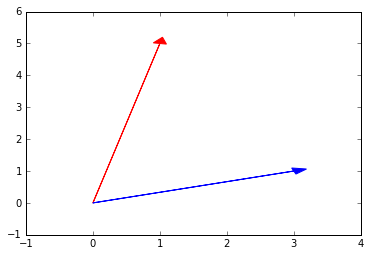

In [15]:
a = np.array([1,5])
b = np.array([3,1])

_, ax = plot_2d_vector([a], origin=None, color="red")
_, ax = plot_2d_vector([b], origin=None, color="blue", ax=ax)
plot_2d_vector([a, b], origin=None, ax=ax, find_lim_only=True)
plt.show()

[1 5] [3 1] [4 6]


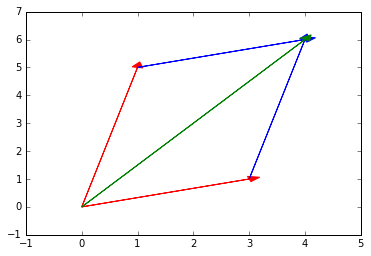

In [21]:
print a, b, a+b

_, ax = plot_2d_vector([a], origin=None, color="red")
_, ax = plot_2d_vector([b], origin=a, color="blue", ax=ax)
_, ax = plot_2d_vector([b], origin=None, color="red", ax=ax)
_, ax = plot_2d_vector([a], origin=b, color="blue", ax=ax)
_, ax = plot_2d_vector([a+b], origin=None, ax=ax, min_max_lim=[a,b,a-b], color="green")
plot_2d_vector([a, b, a+b], origin=None, ax=ax, find_lim_only=True)
plt.show()

[1 5] [3 1] [-2  4]


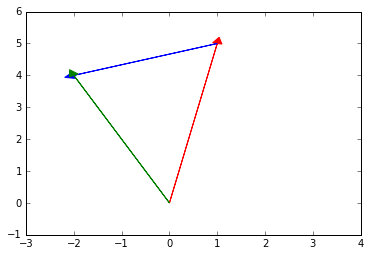

In [23]:
print a, b, a - b

_, ax = plot_2d_vector([a], origin=None, color="red")
_, ax = plot_2d_vector([-b], origin=a, color="blue", ax=ax)
_, ax = plot_2d_vector([a-b], origin=None, ax=ax, min_max_lim=[a,b,a-b], color="green")
plot_2d_vector([a, b, a-b], origin=None, ax=ax, find_lim_only=True)
plt.show()

In [24]:
print a - b, b - a

[-2  4] [ 2 -4]


#### Matrices

In [25]:
A = np.matrix([[1, 2], [3, 4]])
B = np.matrix([[1, 6], [9, 8]])
print A
print B

[[1 2]
 [3 4]]
[[1 6]
 [9 8]]


In [27]:
print A+B
print B+A

[[ 2  8]
 [12 12]]
[[ 2  8]
 [12 12]]


In [28]:
print A-B
print B-A

[[ 0 -4]
 [-6 -4]]
[[0 4]
 [6 4]]


#### Multiplication

In [30]:
print a, b, a*b

[1 5] [3 1] [3 5]


In [34]:
print np.dot(a, b)
print np.dot(b, a)
# print a.dot(b)

8
8
8


In [38]:
c = np.array([-10,10])
d = np.array([5,5])

print np.dot(c, d)

0


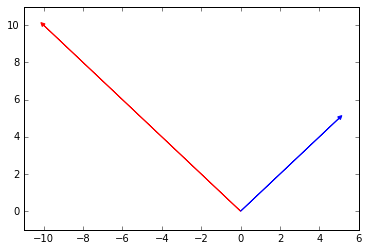

In [39]:
_, ax = plot_2d_vector([c], origin=None, color="red")
_, ax = plot_2d_vector([d], origin=None, color="blue", ax=ax)
plot_2d_vector([c, d], origin=None, ax=ax, find_lim_only=True)
plt.show()

In [44]:
print a
print np.linalg.norm(a)
print np.sqrt(np.dot(a, a))

[1 5]
5.09901951359
5.09901951359


In [ ]:
a_unit = a / np.linalg.norm(a)
print a_unit

In [53]:
def norm(a, order=2):
    return np.sum(a**order)**(1./order)
    
print np.linalg.norm(a, ord=2)
print norm(a, order=2)

5.09901951359
5.09901951359


#### cosine

In [60]:
def cosine(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1)*np.linalg.norm(v2))

In [87]:
print a, 3*a
print np.dot(a, 10*a)
print cosine(a, 10*a)
print cosine(c, d)
print cosine(-2*c, 10*d)
print cosine(a, b)
print 1.0 - scipy.spatial.distance.cosine(a, b)
print math.acos(cosine(a, b))


[1 5] [ 3 15]
260
1.0
0.0
0.0
0.496138938357
0.496138938357
1.05165021255


#### Matrices multiplication

In [88]:
print A
print B

[[1 2]
 [3 4]]
[[1 6]
 [9 8]]


In [89]:
A*B

matrix([[19, 22],
        [39, 50]])

In [90]:
B*A

matrix([[19, 26],
        [33, 50]])

In [91]:
r1A = np.array(A[0,:])[0]
print A[0,:]

c1B = np.array(B[:,0].T)[0]
print B[:,0]

print r1A, c1B
print np.dot(r1A, c1B)

[[1 2]]
[[1]
 [9]]
[1 2] [1 9]
19


In [95]:
C = np.matrix([[1, 2, 3], [3, 4, 5]])
D = np.matrix([[1, 2], [9, 8], [5, 7]])
print C
print C.shape
print D
print D.shape

[[1 2 3]
 [3 4 5]]
(2, 3)
[[1 2]
 [9 8]
 [5 7]]
(3, 2)


In [96]:
print C*D
print C.shape, "*", D.shape, "=", (C*D).shape

[[34 39]
 [64 73]]
(2, 3) * (3, 2) = (2, 2)


In [97]:
print D*C
print D.shape, "*", C.shape, "=", (D*C).shape

[[ 7 10 13]
 [33 50 67]
 [26 38 50]]
(3, 2) * (2, 3) = (3, 3)


In [98]:
# Associative
print (A*B)*C
print A*(B*C)

[[ 85 126 167]
 [189 278 367]]
[[ 85 126 167]
 [189 278 367]]


In [99]:
# Distributive
print D*(A + B)
print D*A + D*B

[[ 26  32]
 [114 168]
 [ 94 124]]
[[ 26  32]
 [114 168]
 [ 94 124]]


#### Special Matrices

In [100]:
np.matrix([1])

matrix([[1]])

In [102]:
np.ones((2,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [103]:
np.zeros((3,2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [104]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [110]:
print A
print A*np.identity(2)
print np.identity(2)*A

[[1 2]
 [3 4]]
[[ 1.  2.]
 [ 3.  4.]]
[[ 1.  2.]
 [ 3.  4.]]


#### Scaling

In [113]:
print a, 3*a

[1 5] [ 3 15]


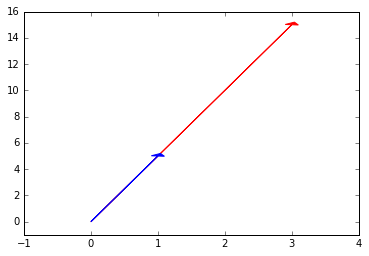

In [116]:
_, ax = plot_2d_vector([3*a], origin=None, color="red")
_, ax = plot_2d_vector([a], origin=None, color="blue", ax=ax)
plot_2d_vector([a, 3*a], origin=None, ax=ax, find_lim_only=True)
plt.show()

In [117]:
print A
print 3*A

[[1 2]
 [3 4]]
[[ 3  6]
 [ 9 12]]


#### Transpose

In [118]:
C

matrix([[1, 2, 3],
        [3, 4, 5]])

In [121]:
# C.transpose()
C.T

matrix([[1, 3],
        [2, 4],
        [3, 5]])

In [125]:
print c
print c.T
print c.shape

[-10  10]
[-10  10]
(2,)


In [129]:
c2 = c.reshape(-1,1)
print c2
print c2.T

[[-10]
 [ 10]]
[[-10  10]]


In [131]:
print A
print A.T.T

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [132]:
print (A*B).T
print B.T * A.T

[[19 39]
 [22 50]]
[[19 39]
 [22 50]]


In [133]:
print (A+B).T
print A.T + B.T

[[ 2 12]
 [ 8 12]]
[[ 2 12]
 [ 8 12]]


#### Symetric matrix

In [134]:
S = np.matrix([[5, 8], [8, 5]])
print S
print S.T

[[5 8]
 [8 5]]
[[5 8]
 [8 5]]


#### Matrix * Vector multiplications

In [137]:
print a
print C
print a.shape
print C.shape

[1 5]
[[1 2 3]
 [3 4 5]]
(2,)
(2, 3)


In [139]:
print a*C, (a*C).shape

[[16 22 28]] (1, 3)


In [145]:
print c
print C
print c*C

[-10  10]
[[1 2 3]
 [3 4 5]]
[[20 20 20]]


In [148]:
print c2
print c2.T*C

[[-10]
 [ 10]]
[[20 20 20]]


#### Inverse

In [149]:
A

matrix([[1, 2],
        [3, 4]])

In [152]:
print np.linalg.inv(A)
# print A**-1

[[-2.   1. ]
 [ 1.5 -0.5]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [156]:
np.round(A * np.linalg.inv(A), 10)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [157]:
(A**-1)**-1

matrix([[ 1.,  2.],
        [ 3.,  4.]])

In [158]:
print (A*B)**-1
print A**-1 * B**-1

[[ 0.54347826 -0.23913043]
 [-0.42391304  0.20652174]]
[[ 0.54347826 -0.2826087 ]
 [-0.35869565  0.20652174]]


#### Singular

In [159]:
A**-1

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [160]:
S = np.matrix([[3, 2],[12, 8]])

In [161]:
np.linalg.det(S)

0.0

In [164]:
# Cannot invert, next line is an error
# S**-1

#### Determinant

[1 5] [3 1] [4 6] [4 6]


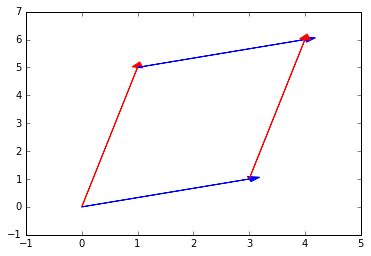

In [165]:
print a, b, a+b, b+a

_, ax = plot_2d_vector([a], origin=None, color="red")
_, ax = plot_2d_vector([b], origin=None, color="blue", ax=ax)
_, ax = plot_2d_vector([b], origin=a, color="blue", ax=ax)
_, ax = plot_2d_vector([a], origin=b, color="red", ax=ax)
plot_2d_vector([a, b, a+b], origin=None, ax=ax, find_lim_only=True)
plt.show()

In [166]:
E = np.matrix([a, b])
E

matrix([[1, 5],
        [3, 1]])

In [169]:
def det_2by2(M):
    return 1.0*M[0,0]*M[1,1] - M[0,1]*M[1,0] 

print det_2by2(E)
print np.linalg.det(E)

-14.0
-14.0


In [170]:
F = np.matrix([[1, 2, 3], [5, 7, 2], [3, 2, 1]])
F

matrix([[1, 2, 3],
        [5, 7, 2],
        [3, 2, 1]])

In [171]:
print np.linalg.det(F)

-28.0


####  Eigenvalues and Eigenvectors
$$ |M-\lambda I|={\begin{vmatrix}2-\lambda &1\\1&2-\lambda \end{vmatrix}}=3-4\lambda +\lambda ^{2}. $$

$$A\vec{e_\lambda} = \lambda\vec{e_\lambda}$$

In [172]:
e_values, e_vectors = np.linalg.eig(F)
e_values, e_vectors

(array([ 9.53112887, -2.        ,  1.46887113]),
 matrix([[-0.32193897, -0.76709295,  0.52692529],
         [-0.89034297,  0.30016681, -0.66685791],
         [-0.32193897,  0.56698174,  0.52692529]]))

In [178]:
e_values[0]*e_vectors[:,0]

matrix([[-3.06844181],
        [-8.48597356],
        [-3.06844181]])

In [179]:
F*e_vectors[:,0]

matrix([[-3.06844181],
        [-8.48597356],
        [-3.06844181]])

In [180]:
for i in range(len(e_values)):
    print "EV",i
    print e_values[i]*e_vectors[:,i]
    print F*e_vectors[:,i]

EV 0
[[-3.06844181]
 [-8.48597356]
 [-3.06844181]]
[[-3.06844181]
 [-8.48597356]
 [-3.06844181]]
EV 1
[[ 1.5341859 ]
 [-0.60033361]
 [-1.13396349]]
[[ 1.5341859 ]
 [-0.60033361]
 [-1.13396349]]
EV 2
[[ 0.77398535]
 [-0.97952833]
 [ 0.77398535]]
[[ 0.77398535]
 [-0.97952833]
 [ 0.77398535]]


In [184]:
e_values[0]*np.identity(3) - F

matrix([[ 8.53112887, -2.        , -3.        ],
        [-5.        ,  2.53112887, -2.        ],
        [-3.        , -2.        ,  8.53112887]])

In [182]:
np.round(np.linalg.det(e_values[0]*np.identity(3) - F), 10)

0.0

### Solving linear equations

$$ 4x_1 - 5x_2 = -13 $$

$$ -2x_1 + 3x_2 = 9 $$

In [200]:
M = np.matrix([[4, -5],[-2, 3]])
Y = np.matrix([[-13],[9]])

In [201]:
M_inv = M**-1
M_inv

matrix([[ 1.5,  2.5],
        [ 1. ,  2. ]])

In [203]:
X = M_inv * Y
X

matrix([[ 3.],
        [ 5.]])

In [206]:
print 4*X[0]-5*X[1]
print -2*X[0]+3*X[1]

[[-13.]]
[[ 9.]]
